In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyteomics import mass, parser
import os
os.chdir("/home/robbe/ionbot/")
import OxiAnalysis as OA
tqdm.pandas()

In [2]:
PSMs = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/OBV_lijst/ionbotPXD002516.csv")

In [3]:
PSMs["Modification"] = PSMs[PSMs["modifications"].notna()]["modifications"].apply(OA.get_modification)
PSMs["Oxmodded?"] = PSMs["Modification"].apply(OA.oxidatively_modified)

In [4]:
OxmoddedPSMs = PSMs[PSMs["Oxmodded?"] == True]

In [5]:
OxmoddedPSMs.shape[0]

25995

25995 Oxmodded PSMs

In [6]:
OxmoddedPSMs_exploded = OxmoddedPSMs.explode("Modification")

In [7]:
OxmoddedPSMs_exploded["Oxmodfilter"] = OxmoddedPSMs_exploded["Modification"].apply(OA.oxidatively_modified)

In [8]:
OxmoddedPSMs_exploded = OxmoddedPSMs_exploded[OxmoddedPSMs_exploded["Oxmodfilter"] == True]

In [9]:
Oxmodcounts = OxmoddedPSMs_exploded["Modification"].value_counts()
Oxmodcounts

[35]oxidation[M]           21216
[35]Oxidation[P]             607
[425]Dioxidation[P]          534
[35]Oxidation[W]             448
[35]Oxidation[I]             369
                           ...  
[275]Nitrosyl[C]               3
[345]Trioxidation[W]           3
[35]Oxidation[C]               2
[720]HNE-Delta:H(2)O[H]        1
[340]Bromo[Y]                  1
Name: Modification, Length: 86, dtype: int64

In [10]:
Oxmodcounts_no_OxM = Oxmodcounts.drop("[35]oxidation[M]")

In [11]:
df = Oxmodcounts_no_OxM.to_frame().reset_index()

In [12]:
df

,index,Modification
0,[35]Oxidation[P],607
1,[425]Dioxidation[P],534
2,[35]Oxidation[W],448
3,[35]Oxidation[I],369
4,[345]Trioxidation[C],256
...,...,...
80,[275]Nitrosyl[C],3
81,[345]Trioxidation[W],3
82,[35]Oxidation[C],2
83,[720]HNE-Delta:H(2)O[H],1


In [24]:
df["Modification"].sum()

5772

5772 Oxidative modifications would not have been able to be found with Comet

[Text(0, 0.5, 'Modification'), Text(0.5, 0, '#Modified PSM')]

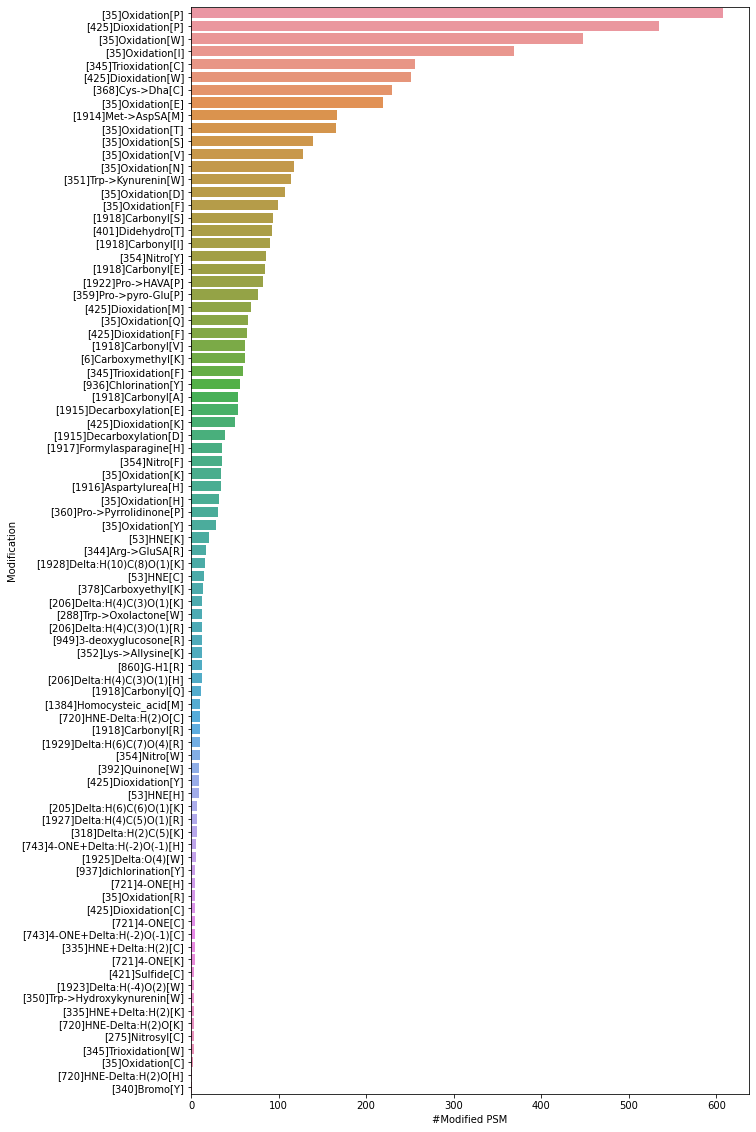

In [23]:
fig, axs =  plt.subplots(figsize=(10,20))
sns.barplot(data=df, x = "Modification", y="index", dodge=False)
axs.set(ylabel="Modification", xlabel="#Modified PSM")